In [1]:
from sklearn.tree import plot_tree
import math as maths
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
import openml
import folium
import pandas as pd
import matplotlib.dates as mdates
from sklearn.compose import make_column_transformer
import folium
from folium import plugins
from folium.plugins import HeatMap
openml.datasets.list_datasets(output_format="dataframe")
dataset = openml.datasets.get_dataset(43584)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")

/home/oscar/.local/lib/python3.10/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [2]:
train_feat, test_feat, train_target, test_target = train_test_split(X[['dayPeriod', 'season', 'dayName', 'rain', 'snow']], X['passengerCount'], test_size=0.3, random_state=1)

In [3]:
ohe = OneHotEncoder()
ohe.fit_transform(train_feat)

<1458644x19 sparse matrix of type '<class 'numpy.float64'>'
	with 7293220 stored elements in Compressed Sparse Row format>

In [4]:
ohe.categories_

[array(['afternoon', 'evening', 'lateNight', 'morning', 'night'],
       dtype=object),
 array(['Spring', 'Summer', 'Winter'], dtype=object),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8)]

In [10]:
model = DecisionTreeClassifier()
pipeline = make_pipeline(
    make_column_transformer((OneHotEncoder(),['dayPeriod']), (OneHotEncoder(), ['season']), (OneHotEncoder(), ['dayName']))
    , model)
pipeline.fit(train_feat, train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(),
                                                  ['dayPeriod']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(), ['season']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(),
                                                  ['dayName'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [6]:
pipeline.score(test_feat, test_target)

0.7089488013769848

In [7]:
plt.figure(figsize=(20,20), dpi=500)
plot_tree(model, filled=True)
plt.savefig('tree.png', dpi=500)

In [8]:
from joblib import dump, load
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

[Text(0.8256618232484076, 0.9615384615384616, 'x[3] <= 0.5\ngini = 0.471\nsamples = 1458644\nvalue = [64, 1033799, 210265, 59945, 28238, 78016, 48312, 3, 2]'),
 Text(0.6947153662420382, 0.8846153846153846, 'x[10] <= 0.5\ngini = 0.486\nsamples = 1085815\nvalue = [58, 755524, 166364, 47605, 22581, 58640, 35039, 2, 2]'),
 Text(0.5821058917197452, 0.8076923076923077, 'x[11] <= 0.5\ngini = 0.477\nsamples = 906107\nvalue = [45, 637112, 134730, 38352, 17777, 48974, 29114, 1, 2]'),
 Text(0.46596337579617836, 0.7307692307692307, 'x[4] <= 0.5\ngini = 0.469\nsamples = 747329\nvalue = [31, 530389, 108385, 30473, 13967, 40128, 23954, 0, 2]'),
 Text(0.35668789808917195, 0.6538461538461539, 'x[8] <= 0.5\ngini = 0.463\nsamples = 542203\nvalue = [20, 387879, 76212, 21686, 9841, 28834, 17730, 0, 1]'),
 Text(0.27229299363057324, 0.5769230769230769, 'x[9] <= 0.5\ngini = 0.459\nsamples = 422849\nvalue = [14, 303628, 58746, 16681, 7487, 22439, 13853, 0, 1]'),
 Text(0.19745222929936307, 0.5, 'x[7] <= 0.5\ngi

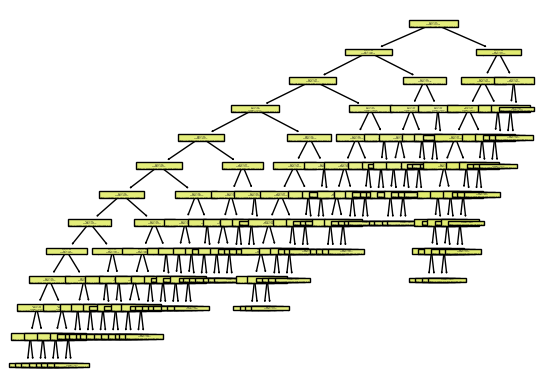

In [9]:
pip2 = load('pipeline.joblib')
plot_tree(pip2['decisiontreeclassifier'], filled=True)

In [13]:
X.dtypes

id                  object
vendorId             uint8
passengerCount       uint8
year                 int64
month                uint8
day                  uint8
hour                 uint8
minute               uint8
second               uint8
season              object
dayName             object
dayPeriod           object
temperature        float64
rain                 uint8
snow                 uint8
startLatitude      float64
startLongitude     float64
endLatitude        float64
endLongitude       float64
flag                object
drivingDistance    float64
drivingTime        float64
geoDistance        float64
tripDuration         int64
dtype: object

In [14]:
X.dtypes[0] == 'object'

True